# k-ближайщих соседей

## Лабораторная работа №1


---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Шатаров Кирилл Александрович

Группа:

Вариант: 1

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/knn-1.csv
1. http://labcolor.space/knn-2.csv
1. http://labcolor.space/knn-3.csv

Скопируйте ссылку для своего варианта.

### Импортирование модулей для выполнения работы

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

Загружаем данные и после выполнения ячейки в выводе должны быть показаны названия столбцов и первые 5 элементов.

In [46]:
df = pd.read_csv("http://labcolor.space/knn-1.csv", dtype={'target':'category'})  # вставьте в виде строки ссылку в read_csv для загрузки данных
df.head(10)

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,target
0,0.233642,-2.856991,-1.124470,1.047026,1.698498,2.205668,5.688430,0.777971,0.838324,-2.730563,2
1,0.930962,-0.848639,-0.914931,0.186634,0.390449,0.761296,1.047490,1.416395,-1.889859,-0.787294,2
2,3.039598,-3.609094,1.297023,-4.875627,-1.214941,0.141744,-1.357529,1.733144,0.413580,2.701917,5
3,-1.316270,3.443701,-0.054570,-3.700956,-2.431620,1.272358,-3.461576,1.079258,-1.252379,-1.932743,4
4,-0.679801,0.463895,-0.171315,-1.476226,0.703294,-0.955350,-2.170080,0.930076,0.076539,1.298095,1
5,1.842113,-0.265326,-2.495969,0.320431,1.827540,0.525889,2.347014,-2.125446,0.003494,0.030022,2
6,-3.797619,-3.303068,3.005378,0.259540,-0.735973,-0.824779,-0.693676,6.716506,-0.229615,-0.185794,2
7,3.649161,-2.455966,-0.870501,-2.119386,2.848477,2.318687,3.040931,0.237800,0.526724,-0.862866,2
8,0.580290,0.633961,3.805714,2.410020,-0.411799,-0.115724,-3.081356,2.572939,-2.653957,-0.022956,2
9,5.016982,-2.623544,0.006787,-1.553979,1.168249,4.476387,4.404959,-10.215873,5.261401,2.845533,5


В слудующих двух ячейках выведется статистика по вашим данным.

In [47]:
df.describe(include='number')

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.071647,-0.033323,-0.070729,-0.165015,0.489056,-0.038457,-0.176141,0.157823,0.011901,0.188988
std,1.882340,1.976146,1.998412,1.969760,1.851486,1.834454,2.511457,3.862871,1.979822,1.778872
min,-5.856612,-6.035980,-7.409478,-6.263850,-5.561504,-7.376715,-8.857109,-11.145410,-6.403031,-5.415565
25%,-1.113012,-1.372909,-1.406289,-1.482332,-0.610556,-1.176715,-1.925499,-2.454186,-1.307162,-0.971578
50%,0.155191,-0.076731,-0.018896,-0.184553,0.643021,-0.011929,-0.007326,-0.071261,-0.027646,0.150210
75%,1.420308,1.361499,1.285955,1.171635,1.694812,1.263112,1.454744,2.595112,1.255757,1.375263
max,6.377722,6.547105,6.208213,5.383358,5.236315,4.793406,7.191294,13.154079,6.185867,5.676245


**Сколько объектов есть в вашем наборе данных?**

Ответ: 1000

**Сколько признаков у ваших объектов?**

Ответ: 10

In [48]:
df.describe(include='category')

,target
count,1000
unique,6
top,1
freq,169


**Сколько классов в вашем целевом признаке?**

Ответ: 6

Теперь оценим распределение по классам

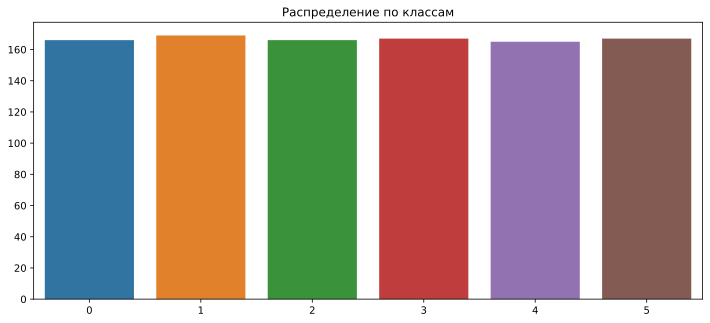

In [49]:
labels, counts = np.unique(df['target'], return_counts=True)
fig, axs = plt.subplots(ncols=1)
sns.barplot(x=[str(label) for label in labels], y=counts, ax=axs).set_title("Распределение по классам")
plt.show()

**Равномерное ли у вас распреденеие по классам?**

Ответ: Распределение по классам равномерное.

## Подготовка данных для работы с моделью

Разделим наши признаки и метки классов.

In [50]:
y = df.pop('target')
X = df

Далее используя метод `train_test_split()` разделите данные на обучающую и проверочную части. В тестовую часть выделите 15% ваши данных и укажите random_state для воспроизводимости вашего результата.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.15)

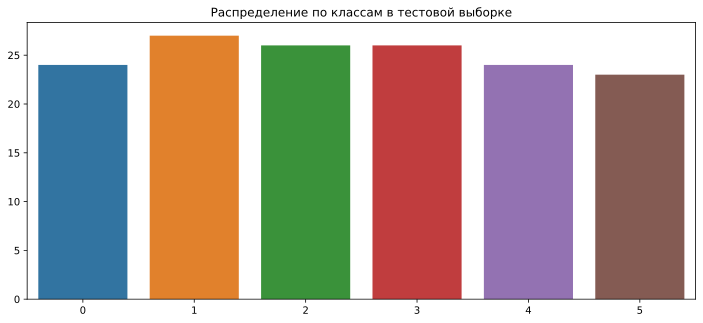

In [52]:
labels, counts = np.unique(y_test, return_counts=True)
fig, axs = plt.subplots(ncols=1)
sns.barplot(x=[str(label) for label in labels], y=counts, ax=axs).set_title("Распределение по классам в тестовой выборке")
plt.show()

**Равномерное ли у вас распреденеие по классам в тестовой выборке и каким оно должно быть в идеальном случае?**

Ответ: Распределение по классам близко к равномерному, в идеальном случае в каждом класссе должно быть одинаковое количество объектов.

Стандартизация признаков путем вычитания среднего значения и масштабирования до единичной дисперсии.

In [ ]:
scaler = StandardScaler()

Используя объект `scaler` вычислите среднее и стандартное отклонение для последующего масштабирования признаков с помощью метода `fit`.

С помощью метода `transform` преобразуйте ваши данные и сохраните их в новые переменные.

In [73]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [74]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled.mean(axis=0)

array([ 1.04491579e-17, -8.35932630e-18,  2.29881473e-17,  2.71678105e-17,
        2.29881473e-17, -7.31441052e-18, -1.67186526e-17,  1.88084842e-17,
        2.92576421e-17,  2.61228947e-17])

In [76]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [77]:
X_test_scaled.mean(axis=0)

array([ 1.18423789e-17,  1.48029737e-17, -3.55271368e-17,  0.00000000e+00,
       -7.69754630e-17, -2.07241631e-17,  1.18423789e-17,  0.00000000e+00,
       -4.73695157e-17,  2.36847579e-17])

In [78]:
X_test_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Для чего требуется предобработка данных?**

Ответ: Для многих моделей машинного обучения важно, чтобы количественные данные имели одинаковый масштаб. Это справедливо для алгоритмов, рассчитывающих расстояние, в частности для алгоритма k-ближайших соседей (knn).

Также предобработка данных позволяет найти в данных пропуски, аномалии, выбросы, дублирования и другие ошибки и несоответствия в данных. Тем самым предобработка данных непосредственно улучшает качество модели.

## Создание и обучение классификатора

Создайте классификатор knn указав аргументы:
- n_neighbors - количество соседей
- metric - способ засчета расстояний между объектами
- algorithm - оставляйте 'brute'

In [171]:
clf = KNeighborsClassifier(n_neighbors=9, metric='euclidean', algorithm='brute')

С помощью метода fit для объекта обучите вашу модель, для обучения используйте предобработанные данные.

In [172]:
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=9)

## Оценка модели

Проверьте результат работы вашей модели используя медот `score` классификатора, передав в него тестовую часть ваших данных.

In [173]:
clf.score(X_test_scaled, y_test)

0.7866666666666666

**Что значит данное число?**

Ответ: Правильность модели для тестового набора составляет приблизительно 0.79, это означает, что дан правильный прогноз для 79% данных в тестовом наборе. При некоторых математических допущениях, это означает, что модель в 79% случаев даст правильный прогноз для новых объектов.

## Выбор оптимального значения для n_neighbors с помощью метода «Локтя»

In [133]:
# пустой список error_rates. Проходимся по различным значениям n_neighbors и добавляем их частоту ошибок в этот список.
error_rates = []

In [134]:
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train_scaled, y_train)
    new_predictions = new_model.predict(X_test_scaled)
    error_rates.append(np.mean(new_predictions != y_test))

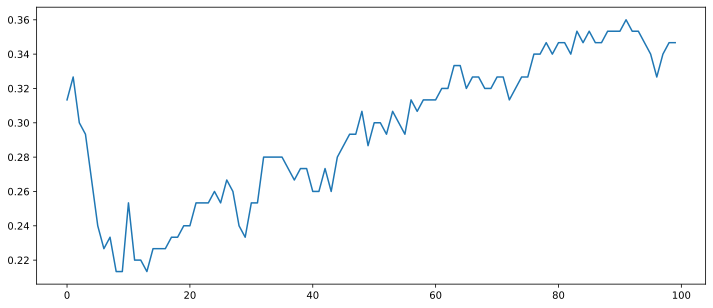

In [135]:
plt.plot(error_rates)

Как видно из графика, минимальная частота ошибок достигается при значении n_neighbors, равном приблизительно 9.

Для построения матрицы ошибок, замените комментарии на ваши переменные.

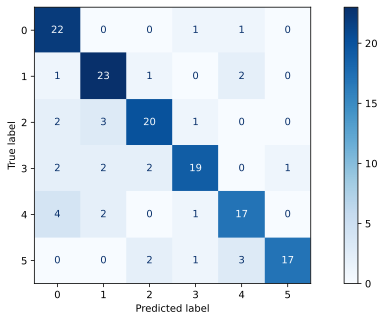

In [155]:
ConfusionMatrixDisplay.from_estimator(
    clf, # Объект вашего классификатора
    X_test_scaled, # множество тестовых объектов,
    y_test, # множество тестовых меток классов,
    display_labels=np.unique(y),
    cmap=plt.cm.Blues,
    normalize=None,
)

**Что показывает матрица ошибок?**

Ответ: Матрица ошибок показывает число верно и неверно предсказанных классов.

Вернитесь в раздел "Создание и обучение классификатора" и попробуйте другие варианты параметров для модели k-ближайших соседей (количество соседей и метрик)

**Итоговые результаты**

Максимальная оценка вашей модели (score): 0.7866666666666666

Параметры лучшей модели:

- количество соседей: 9
- метрика: euclidean

## Контрольные вопросы

**Опишите алгоритм работы метода k-ближайших соседей.**

Ответ:
1. Выбрать число соседей (k)
2. Выбрать объект без класса
3. Вычислить расстояния от выбранного объекта, до всех остальных объектов
4. Выбрать k объектов с минимальным расстоянием
5. Присвоение объекта к классу, которого больше среди соседей k
6. Повторение пунктов со 2-5

**Чем отличаются l1 и l2 метрики?**

Ответ:   
l1 (Манхэттенское расстояние): |x1 - x2| + |y1 - y2|   
l2 (Евклидово расстояние): √((x1 - x2)^2 + (y1 - y2)^2)   
l1 метрика измеряет расстояние между двумя точками, двигаясь только вдоль перпендикулярных осей.   
l2 метрика измеряет расстояние как прямую линию между двумя точками.